### Comparison of linear auto-encoder and pca for dimensionality reduction

In [1]:
%matplotlib inline

In [2]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import keras

from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam

/Users/Vlad/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### PCA

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

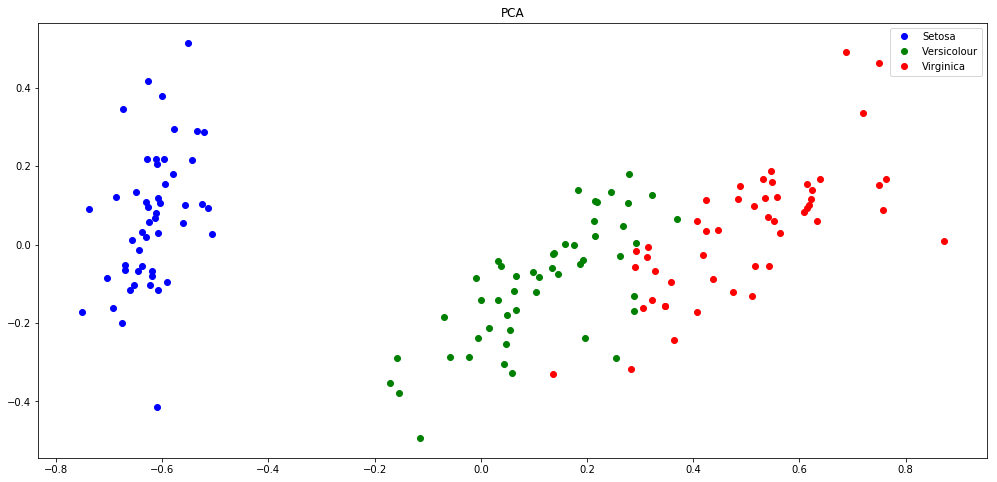

In [5]:
plt.subplots(figsize=(17, 8))
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica');
plt.title('PCA');
plt.legend();

#### Auto Encoder

In [18]:
input_shape = X_scaled.shape[1]
encode_shape = 2
input_ = Input((input_shape,))
encoder = Dense(encode_shape, activation='linear', name='encoder')(input_)
decoder = Dense(input_shape, activation='linear', name='decoder')(encoder)
model = Model(input_, decoder)
model.compile(Adam(1e-3), 'mse')
model.fit(X_scaled, X_scaled, batch_size=8, epochs=100)

Epoch 1/100
150/150 [==============================] - 0s 2ms/step - loss: 0.1874
Epoch 2/100
150/150 [==============================] - 0s 532us/step - loss: 0.1637
Epoch 3/100
150/150 [==============================] - 0s 312us/step - loss: 0.1458
Epoch 4/100
150/150 [==============================] - 0s 259us/step - loss: 0.1320
Epoch 5/100
150/150 [==============================] - 0s 297us/step - loss: 0.1197
Epoch 6/100
150/150 [==============================] - 0s 309us/step - loss: 0.1090
Epoch 7/100
150/150 [==============================] - 0s 287us/step - loss: 0.0996
Epoch 8/100
150/150 [==============================] - 0s 287us/step - loss: 0.0910
Epoch 9/100
150/150 [==============================] - 0s 292us/step - loss: 0.0832
Epoch 10/100
150/150 [==============================] - 0s 300us/step - loss: 0.0764
Epoch 11/100
150/150 [==============================] - 0s 295us/step - loss: 0.0702
Epoch 12/100
150/150 [==============================] - 0s 324us/step - loss

150/150 [==============================] - 0s 206us/step - loss: 0.0035
Epoch 98/100
150/150 [==============================] - 0s 425us/step - loss: 0.0035
Epoch 99/100
150/150 [==============================] - 0s 250us/step - loss: 0.0034
Epoch 100/100
150/150 [==============================] - 0s 274us/step - loss: 0.0034


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
encoder (Dense)              (None, 2)                 10        
_________________________________________________________________
decoder (Dense)              (None, 4)                 12        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [20]:
prediction = model.predict(X_scaled)

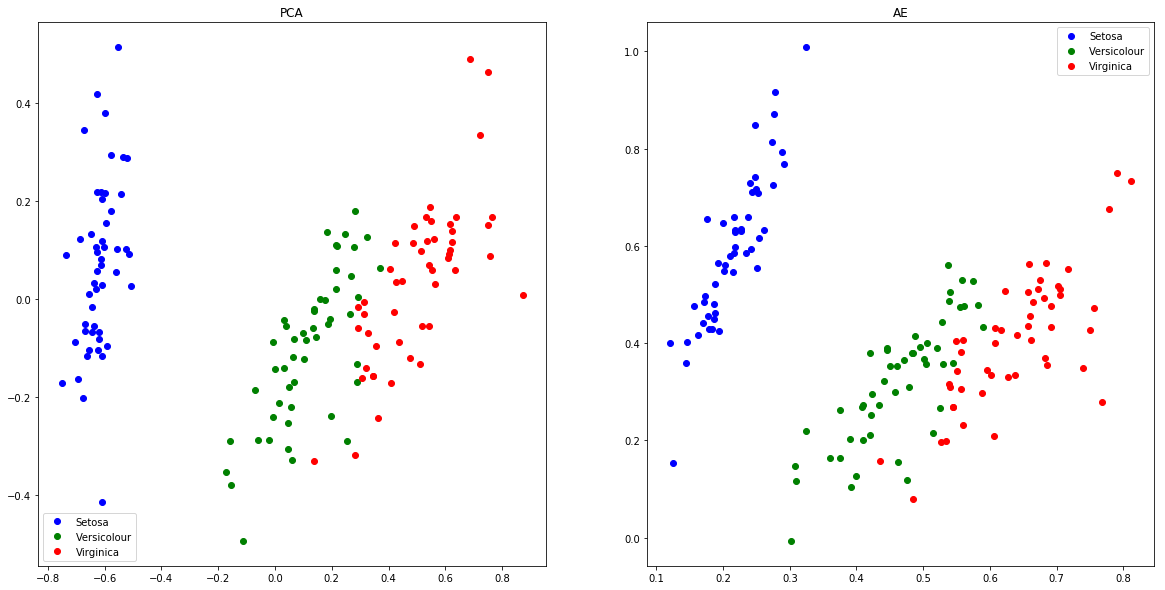

In [21]:
plt.subplots(figsize=(20, 10))
plt.subplot(121)
plt.title('PCA')
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend()
plt.subplot(122)
plt.title('AE')
plt.plot(prediction[y == 0, 0], prediction[y == 0, 1], 'bo', label='Setosa')
plt.plot(prediction[y == 1, 0], prediction[y == 1, 1], 'go', label='Versicolour')
plt.plot(prediction[y == 2, 0], prediction[y == 2, 1], 'ro', label='Virginica');
plt.legend();